<a href="https://colab.research.google.com/github/Truth300/truth_data/blob/main/carprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_csv('/content/cardekho.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [5]:
df.rename(columns={'selling_price': 's/p', 'km_driven': 'km', 'mileage(km/ltr/kg)': 'ltr/kg'}, inplace=True)
df.head()

,name,year,s/p,km,fuel,seller_type,transmission,owner,ltr/kg,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [ ]:
df['seller_type'].head(30)

In [7]:
df.shape

(8128, 12)

In [8]:
df.isna().sum()

name              0
year              0
s/p               0
km                0
fuel              0
seller_type       0
transmission      0
owner             0
ltr/kg          221
engine          221
max_power       215
seats           221
dtype: int64

In [9]:
df['ltr/kg'].mean()

19.41878335651954

In [ ]:
df['ltr/kg'].head(30)

In [11]:
df.isna().any()

name            False
year            False
s/p             False
km              False
fuel            False
seller_type     False
transmission    False
owner           False
ltr/kg           True
engine           True
max_power        True
seats            True
dtype: bool

In [ ]:
if df.isna().any().any():
  df.fillna(0,inplace=True)
df.isna().any()

In [ ]:
for i in df['ltr/kg'].index:
  if df['ltr/kg'][i] == 0.00:
    df['ltr/kg'][i] = round(19.41878335651954, 2)
df['ltr/kg'].head(40)

In [16]:
df['engine'].mean()

1418.9650590551182

In [ ]:
df['engine'].head(30)

In [ ]:
for i in df['engine'].index:
  if df['engine'][i]==0.00:
    df['engine'][i]=round(1418.9650590551182,1)
df['engine'].head(30)

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8123    False
8124    False
8125    False
8126     True
8127     True
Length: 8128, dtype: bool

In [18]:
df.drop_duplicates(keep='last')
df.head()

,name,year,s/p,km,fuel,seller_type,transmission,owner,ltr/kg,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [ ]:
df.drop(columns=['seats'])

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<Axes: ylabel='Density'>

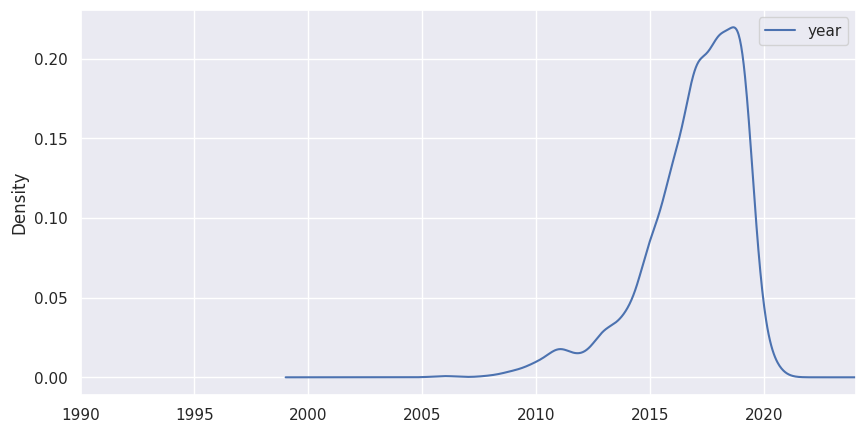

In [21]:
df.nlargest(1000,columns='s/p').plot(x='s/p',y='year',kind='kde',figsize=(10,5),alpha=1,xlim=(1990,2024))

In [22]:
x=df['s/p']
y=df['engine']

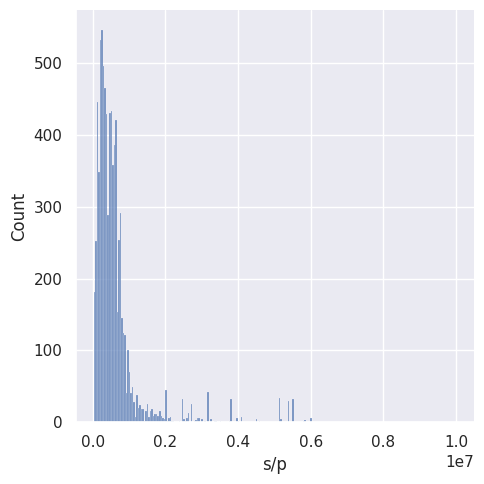

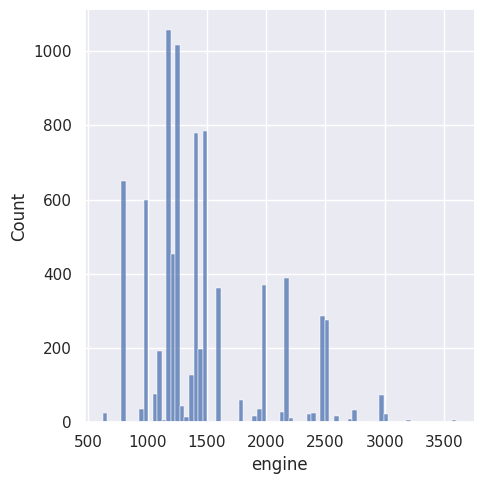

In [23]:
sns.displot(df['s/p'])
sns.displot(df['engine'])

<Axes: xlabel='ltr/kg', ylabel='Density'>

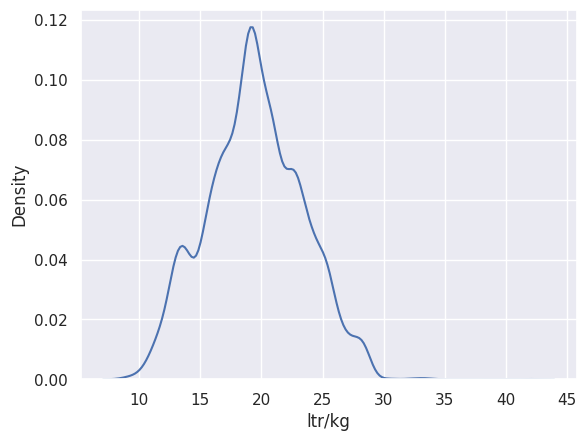

In [24]:
sns.kdeplot(df['ltr/kg'])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


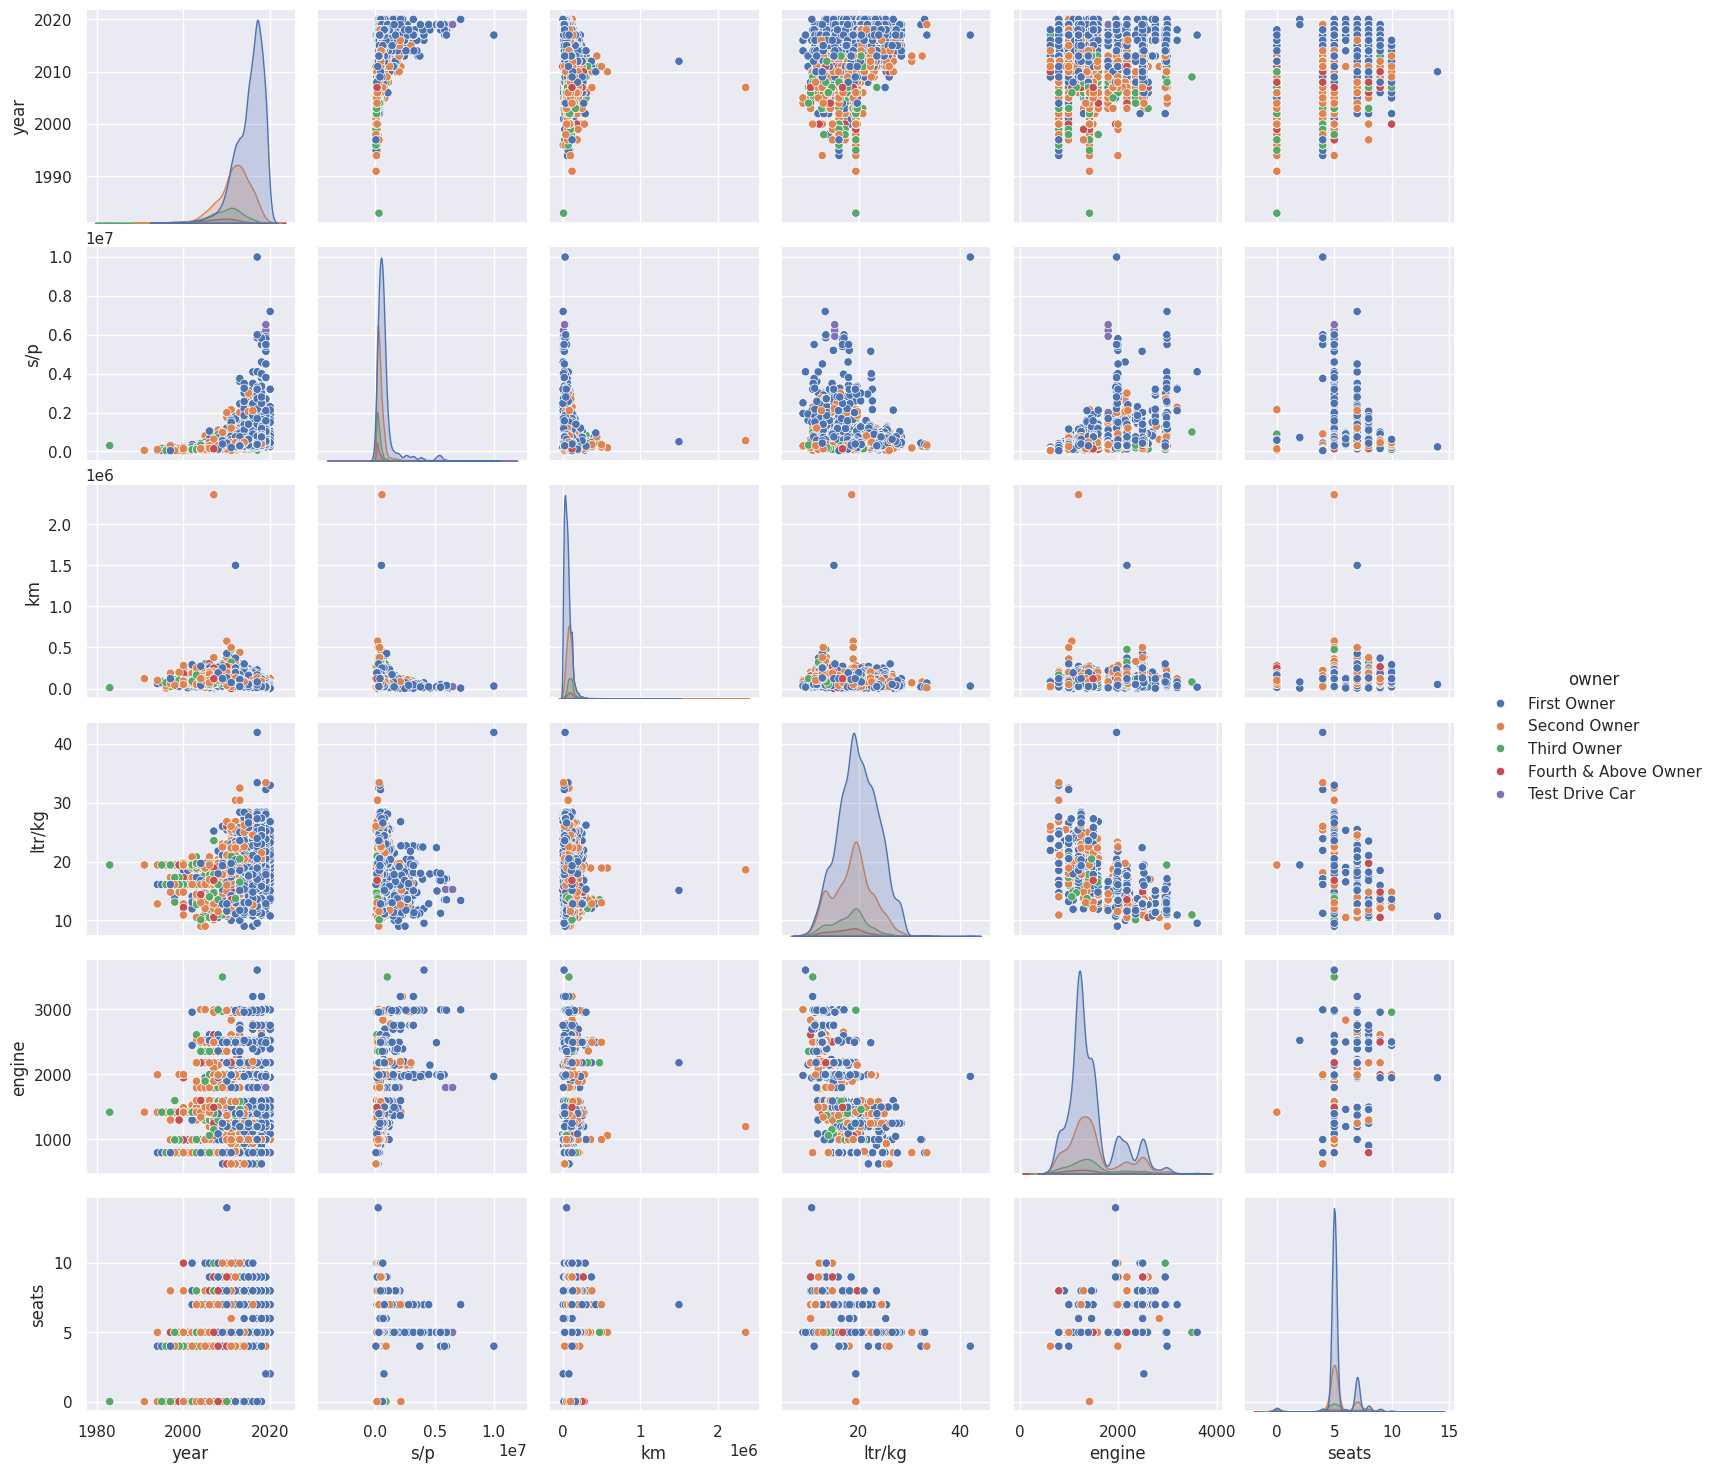

In [ ]:
sns.pairplot(df,hue='owner',size=2.5)

<Figure size 2900x1000 with 0 Axes>

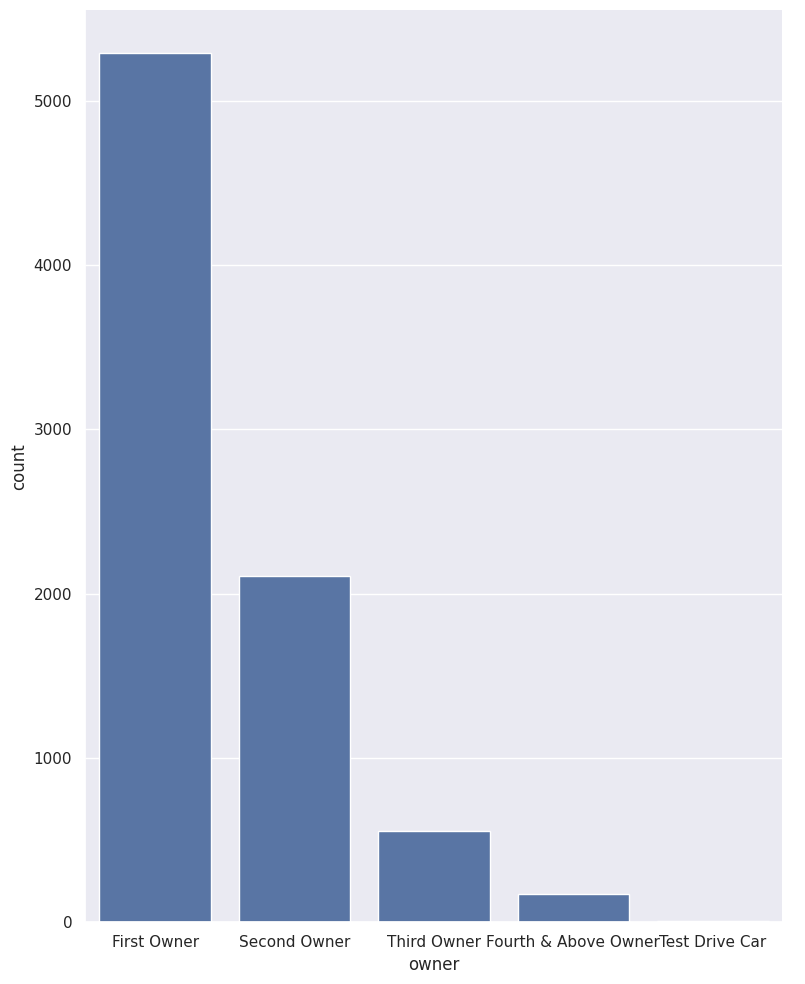

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(29,10))
sns.catplot(x="owner", data=df, kind="count", height=10, aspect=.8)

<Axes: xlabel='engine', ylabel='ltr/kg'>

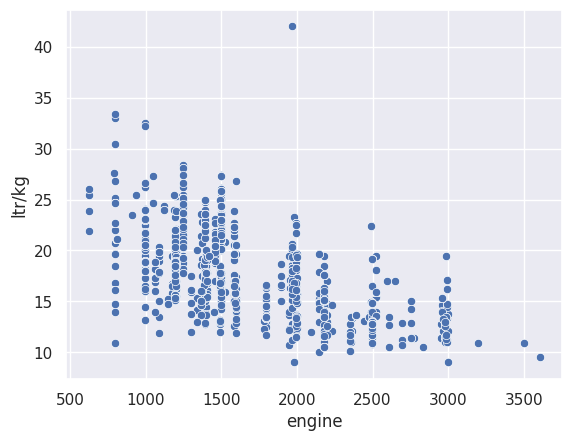

In [ ]:
sns.scatterplot(x=df['engine'],y=df['ltr/kg'])

<Axes: ylabel='name'>

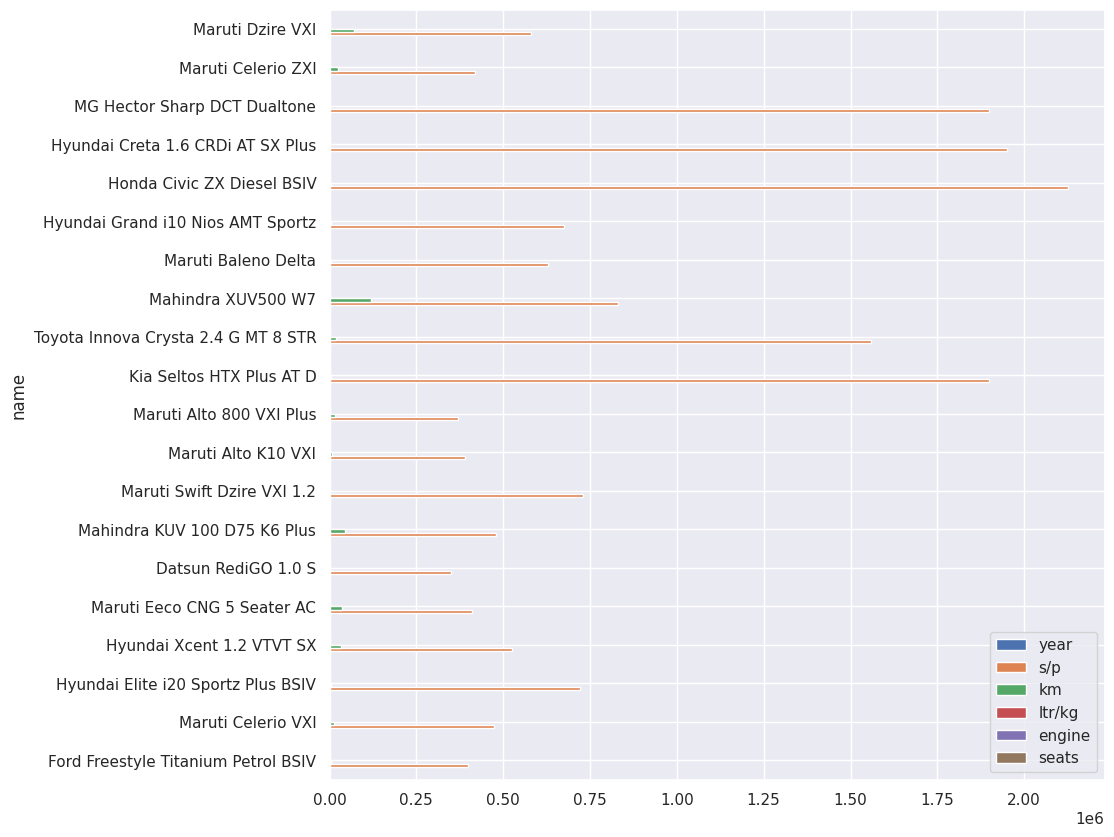

In [ ]:
df.nlargest(20,columns='year').plot(x='name',kind="barh",figsize=(10,10))


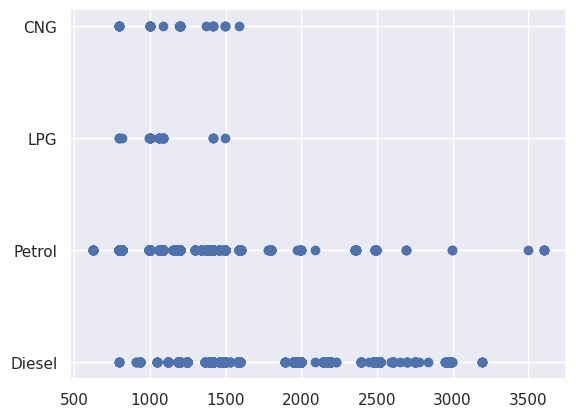

In [ ]:
plt.scatter(df['engine'],df['fuel'])

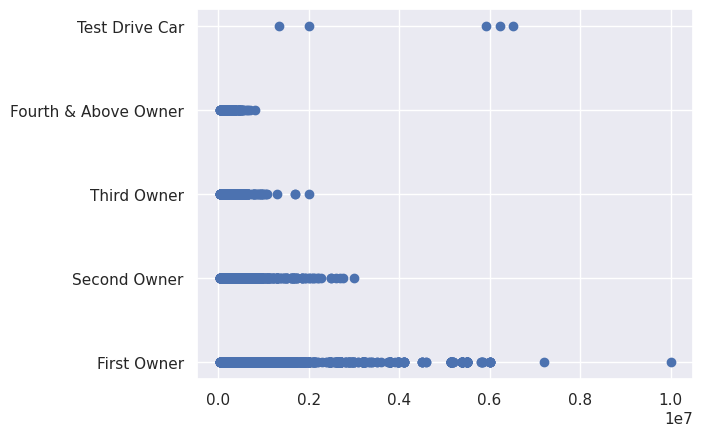

In [ ]:
plt.scatter(df['s/p'],df['owner'])